In [3]:
import pandas as pd

   # Завантаження даних
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

   # Перегляд перших рядків
print(df.head())
   
   # Огляд інформації про набір даних
print(df.info())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [5]:
print(df.dtypes)

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [6]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)


In [7]:
for col in df.select_dtypes(include=['object']):
    print(f"У стовпці '{col}' знайдені унікальні значення:\n", df[col].unique())


У стовпці 'Gender' знайдені унікальні значення:
 ['Male' 'Female']
У стовпці 'Occupation' знайдені унікальні значення:
 ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
У стовпці 'BMI Category' знайдені унікальні значення:
 ['Overweight' 'Normal' 'Obese' 'Normal Weight']
У стовпці 'Blood Pressure' знайдені унікальні значення:
 ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
У стовпці 'Sleep Disorder' знайдені унікальні значення:
 [nan 'Sleep Apnea' 'Insomnia']


In [9]:
print(df.columns)



Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


In [12]:
print(df.isnull().sum())


Person ID                    0
Gender                     374
Age                          0
Occupation                 374
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [14]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [15]:
df.fillna(df.mean(), inplace=True)

In [16]:
df.drop_duplicates(inplace=True)

In [26]:
df['category_column'] = df['Gender'].astype('category').cat.codes
df['category_column'] = df['Occupation'].astype('category').cat.codes
df['category_column'] = df['BMI Category'].astype('category').cat.codes
df['category_column'] = df['Blood Pressure'].astype('category').cat.codes
df['category_column'] = df['Sleep Disorder'].astype('category').cat.codes

In [27]:
# Описова статистика
print(df.describe())

        Person ID  Gender         Age  Occupation  Sleep Duration  \
count  374.000000     0.0  374.000000         0.0      374.000000   
mean   187.500000     NaN   42.184492         NaN        7.132086   
std    108.108742     NaN    8.673133         NaN        0.795657   
min      1.000000     NaN   27.000000         NaN        5.800000   
25%     94.250000     NaN   35.250000         NaN        6.400000   
50%    187.500000     NaN   43.000000         NaN        7.200000   
75%    280.750000     NaN   50.000000         NaN        7.800000   
max    374.000000     NaN   59.000000         NaN        8.500000   

       Quality of Sleep  Physical Activity Level  Stress Level  BMI Category  \
count        374.000000               374.000000    374.000000           0.0   
mean           7.312834                59.171123      5.385027           NaN   
std            1.196956                20.830804      1.774526           NaN   
min            4.000000                30.000000      3.00

In [ ]:
%pip install seaborn
%pip install matplotlib.pyplot

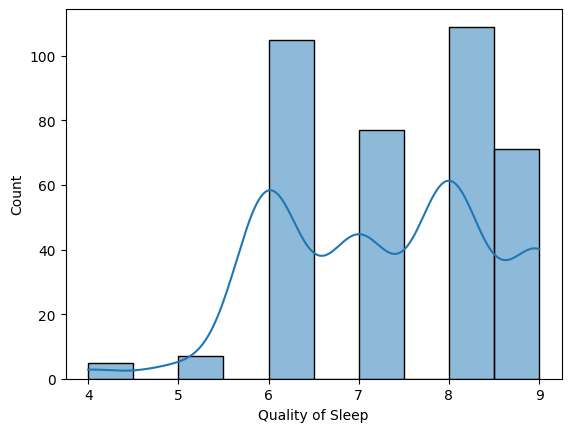

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Quality of Sleep'], bins=10, kde=True)
plt.show()

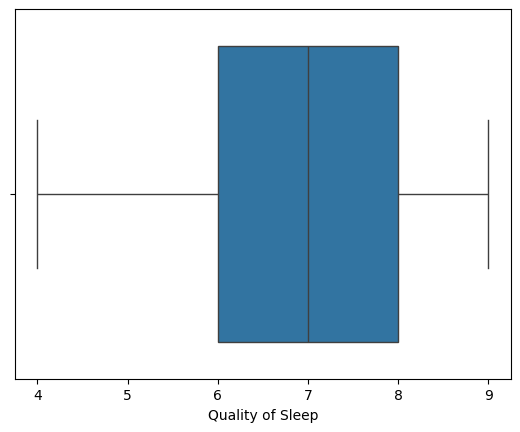

In [43]:
sns.boxplot(x=df['Quality of Sleep'])
plt.show()

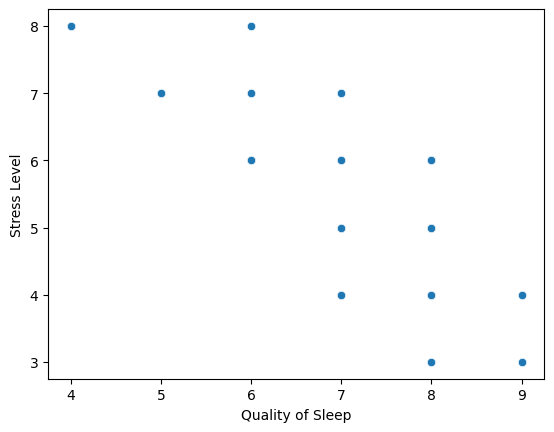

In [44]:
sns.scatterplot(x=df['Quality of Sleep'], y=df['Stress Level'])
plt.show()

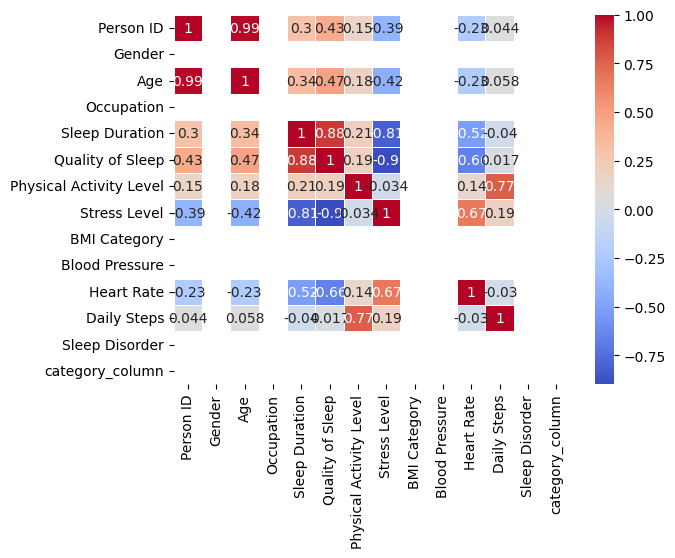

In [45]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()